In [1]:
# variables with suffix '_n' denote that nudged data are being used
# variables with prefix 'd' denote derivative

# dependencies
using MovingWeightedLeastSquares
using Plots
using Cubature
using Interpolations
using Base.Profile

# initialization of PGFPlots plotting backend
pgfplots();

In [2]:
# initialize the dataset in this Jupyter notebook cell

# from, to, step
from = -6;
to = 6;
step = .2;
# a random number in interval (-ng/2, ng/2) will be added to each x in xs
ng = .2;
# function to be approximated
f = x -> sin(2x)/2 + 10;
df = x -> cos(2x)
# weight function
w = (d, e) -> exp(-d^2/step^2);
# degree of used polynomial for approximation
deg = 2;
# eps of the weight function
eps = .6;
# attempts for time measurement
time_tries = 100;

In [3]:
rg = from:step:to
xs = collect(rg);
# comment the line below, if repeated evaluation with the same nudges is needed
xs_n = xs .+ ng * rand(size(xs)) - ng/2;
fs = [f(x) for x in xs];
fs_n = [f(x) for x in xs_n];
dfs = [df(x) for x in xs];
dfs_n = [df(x) for x in xs_n];

# creation of approximation objects
nv = mwlsNaive(xs, fs, eps, w, maxDegree = deg);
nv_n = mwlsNaive(xs_n, fs_n, eps, w, maxDegree = deg);
kd = mwlsKd(xs, fs, eps, w, maxDegree = deg);
kd_n = mwlsKd(xs_n, fs_n, eps, w, maxDegree = deg);
cll = mwlsCll(xs, fs, eps, w, maxDegree = deg);
cll_n = mwlsCll(xs_n, fs_n, eps, w, maxDegree = deg);
xs

61-element Array{Float64,1}:
 -6.0
 -5.8
 -5.6
 -5.4
 -5.2
 -5.0
 -4.8
 -4.6
 -4.4
 -4.2
 -4.0
 -3.8
 -3.6
  ⋮  
  3.8
  4.0
  4.2
  4.4
  4.6
  4.8
  5.0
  5.2
  5.4
  5.6
  5.8
  6.0

In [4]:
function plot_func(xs::Vector{T}, ys::Vector{T}, title::String = "") where {T <: Real}
    plot(xs, ys, label = false, title = title)
end

plot_func (generic function with 2 methods)

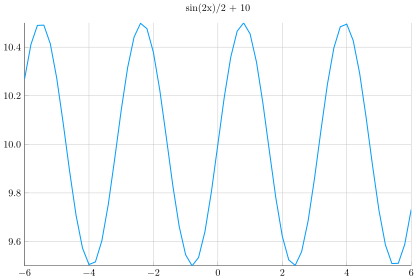

In [5]:
# graph of the original function
plot_func(xs, fs, "sin(2x)/2 + 10")

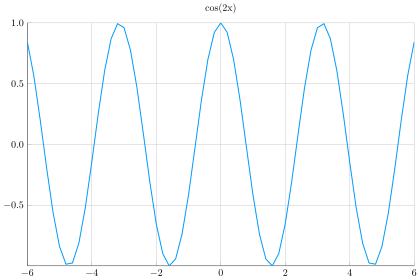

In [6]:
plot_func(xs, dfs, "cos(2x)")

In [7]:
function mass_approx(obj::MwlsObject, xs::Array{T}) where {T <: Real}
    [obj(x) for x in xs]
end

mass_approx (generic function with 1 method)

In [8]:
function mass_diff(obj::MwlsObject, xs::Array{T}) where {T <: Real}
    [mwlsDiff(obj, x, 1) for x in xs]
end

mass_diff (generic function with 1 method)

In [9]:
function errfunc(obj::MwlsObject, reffunc::Function, b, e)
    hquadrature(x -> abs(obj(x) - reffunc(x))/(e - b), b, e, abstol = 1e-8)
end

errfunc (generic function with 1 method)

In [10]:
function derrfunc(obj::MwlsObject, reffunc::Function, b, e)
    hquadrature(x -> abs(mwlsDiff(obj, x, 1) - reffunc(x))/(e - b), b, e, abstol = 1e-8 )
end

derrfunc (generic function with 1 method)

In [11]:
# construction of approximation at each input vector
nvs = mass_approx(nv, xs);

In [12]:
@time begin 
    for i in 1:time_tries
        mass_approx(nv, xs)
    end
end

  6.119928 seconds (27.40 M allocations: 879.880 MiB, 5.81% gc time)


In [13]:
kds = mass_approx(kd, xs);

In [14]:
@time begin
    for i in 1:time_tries
        mass_approx(kd, xs)
    end
end

  3.277001 seconds (13.96 M allocations: 413.222 MiB, 5.10% gc time)


In [15]:
clls = mass_approx(cll, xs);

In [16]:
@time begin
    for i in 1:time_tries
        mass_approx(cll, xs)
    end
end

  5.887115 seconds (22.24 M allocations: 1.195 GiB, 5.96% gc time)


In [17]:
nvs_n = mass_approx(nv_n, xs_n);

In [18]:
@time begin
    for i in 1:time_tries
        mass_approx(nv_n, xs_n)
    end
end

  6.606102 seconds (25.15 M allocations: 818.715 MiB, 5.44% gc time)


In [19]:
kds_n = mass_approx(kd_n, xs_n);

In [20]:
@time begin
    for i in 1:time_tries
        mass_approx(kd_n, xs_n)
    end
end

  3.844627 seconds (14.11 M allocations: 417.310 MiB, 4.73% gc time)


In [21]:
clls_n = mass_approx(cll_n, xs_n);

In [22]:
@time begin
    for i in 1:time_tries
        mass_approx(cll_n, xs_n)
    end
end

  6.561972 seconds (19.99 M allocations: 1.136 GiB, 5.81% gc time)


In [23]:
dnvs = mass_diff(nv, xs);

In [24]:
@time for i in 1:time_tries
    mass_diff(nv, xs)
end

  6.519730 seconds (27.55 M allocations: 887.886 MiB, 6.05% gc time)


In [25]:
dkds = mass_diff(kd, xs);

In [26]:
@time for i in 1:time_tries
    mass_diff(kd, xs);
end

  3.963443 seconds (14.11 M allocations: 421.228 MiB, 5.79% gc time)


In [27]:
dclls = mass_diff(cll, xs);

In [28]:
@time for i in 1:time_tries
    mass_diff(cll, xs);
end

  6.184369 seconds (22.39 M allocations: 1.203 GiB, 6.53% gc time)


In [29]:
dnvs_n = mass_diff(nv_n, xs_n);

In [30]:
@time for i in 1:time_tries
    mass_diff(nv_n, xs_n)
end

  5.954868 seconds (25.30 M allocations: 826.721 MiB, 6.02% gc time)


In [31]:
dkds_n = mass_diff(kd_n, xs_n);

In [32]:
@time for i in 1:time_tries
    mass_diff(kd_n, xs_n);
end

  3.401050 seconds (14.26 M allocations: 425.316 MiB, 5.46% gc time)


In [33]:
dclls_n = mass_diff(cll_n, xs_n);

In [34]:
@time for i in 1:time_tries
    mass_diff(cll_n, xs_n);
end

  5.499031 seconds (20.14 M allocations: 1.144 GiB, 6.42% gc time)


In [35]:
# absolute errors of approximations
nverr = abs.(nvs .- fs);
kderr = abs.(kds .- fs);
cllerr = abs.(clls .- fs);
dnverr = abs.(dnvs .- dfs);
dkderr = abs.(dkds .- dfs);
dcllerr = abs.(dclls .- dfs);
nverr_n = abs.(nvs_n .- fs_n);
kderr_n = abs.(kds_n .- fs_n);
cllerr_n = abs.(clls_n .- fs_n);
dnverr_n = abs.(dnvs_n .- dfs_n);
dkderr_n = abs.(dkds_n .- dfs_n);
dcllerr_n = abs.(dclls_n .- dfs_n);

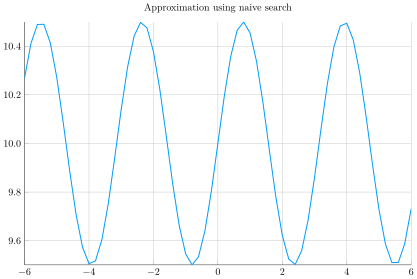

In [36]:
plot_func(xs, nvs, "Approximation using naive search")

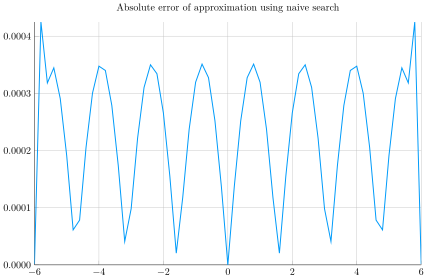

In [37]:
plot_func(xs, nverr, "Absolute error of approximation using naive search")

In [38]:
# error of the approximation
errfunc(nv, f, from, to)

(0.000273941638939975, 9.854496796610118e-9)

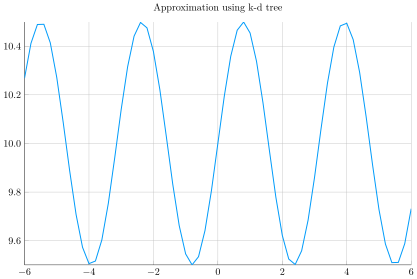

In [39]:
plot_func(xs, kds, "Approximation using k-d tree")

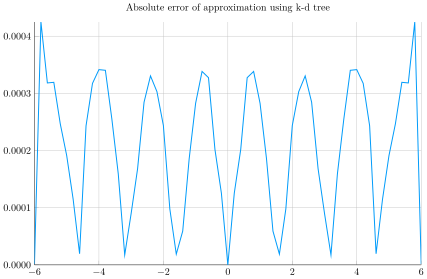

In [40]:
plot_func(xs, kderr, "Absolute error of approximation using k-d tree")

In [41]:
# error of the approximation
errfunc(kd, f, from, to)

(0.0002739416389474902, 9.854501511074791e-9)

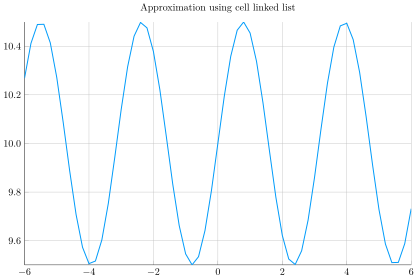

In [42]:
plot_func(xs, clls, "Approximation using cell linked list")

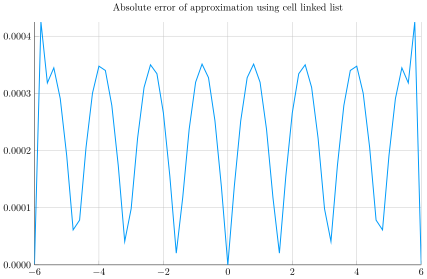

In [43]:
plot_func(xs, cllerr, "Absolute error of approximation using cell linked list")

In [44]:
# error of the approximation
errfunc(cll, f, from, to)

(0.00027394163906127605, 9.854589815006374e-9)

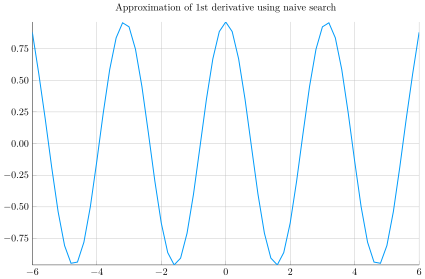

In [45]:
plot_func(xs, dnvs, "Approximation of 1st derivative using naive search")

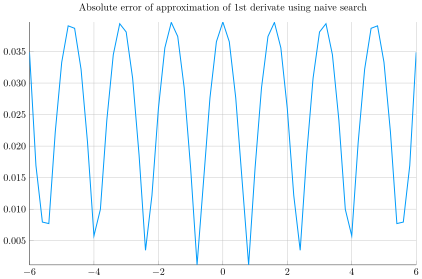

In [46]:
plot_func(xs, dnverr, "Absolute error of approximation of 1st derivate using naive search")

In [47]:
derrfunc(nv, df, from, to)

(0.023780149820807103, 9.99458066412761e-9)

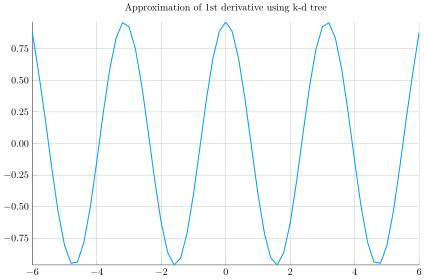

In [48]:
plot_func(xs, dkds, "Approximation of 1st derivative using k-d tree")

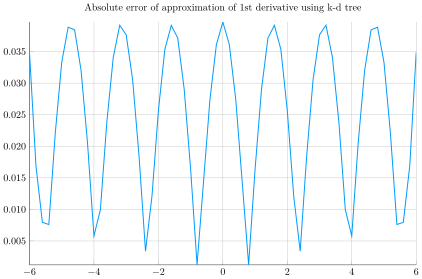

In [49]:
plot_func(xs, dkderr, "Absolute error of approximation of 1st derivative using k-d tree")

In [50]:
derrfunc(kd, df, from, to)

(0.023780149820804827, 9.994580355803748e-9)

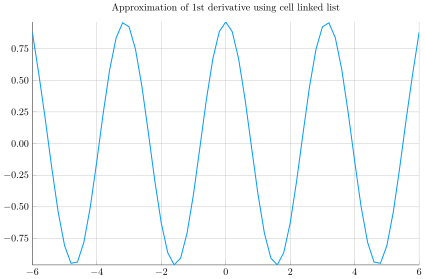

In [51]:
plot_func(xs, dclls, "Approximation of 1st derivative using cell linked list")

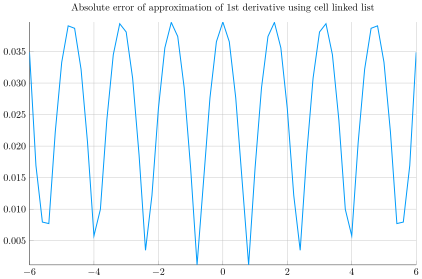

In [52]:
plot_func(xs, dcllerr, "Absolute error of approximation of 1st derivative using cell linked list")

In [53]:
derrfunc(cll, df, from, to)

(0.02378014981849425, 9.993892995132011e-9)

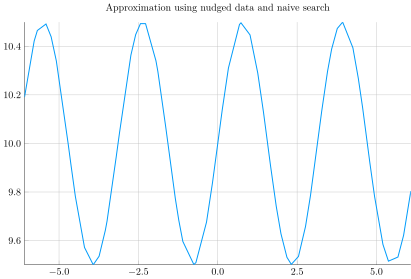

In [54]:
plot_func(xs_n, nvs_n, "Approximation using nudged data and naive search")

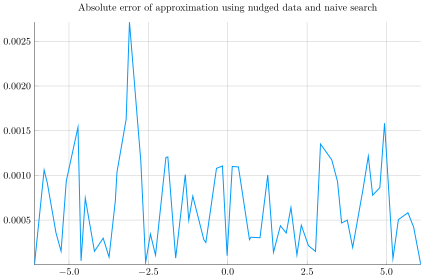

In [55]:
plot_func(xs_n, nverr_n, "Absolute error of approximation using nudged data and naive search")

In [56]:
# error of the approximation
errfunc(nv_n, f, from, to)

(0.0010747578019527858, 9.9482638374185e-9)

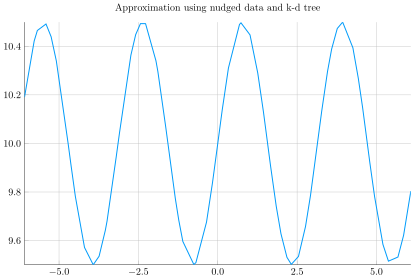

In [57]:
plot_func(xs_n, kds_n, "Approximation using nudged data and k-d tree")

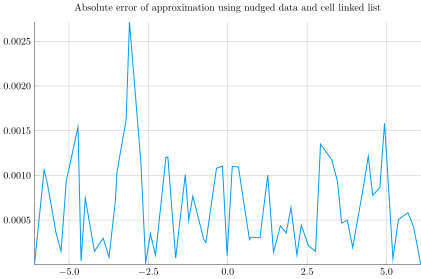

In [58]:
plot_func(xs_n, kderr_n, "Absolute error of approximation using nudged data and cell linked list")

In [59]:
# error of the approximation
errfunc(kd_n, f, from, to)

(0.0010747577939763538, 9.96194399016402e-9)

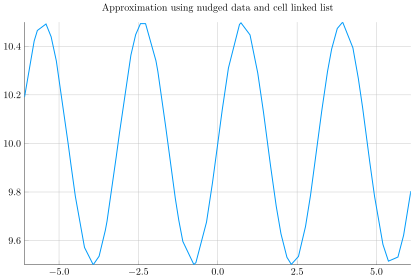

In [60]:
plot_func(xs_n, clls_n, "Approximation using nudged data and cell linked list")

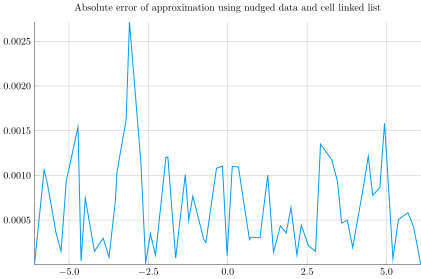

In [61]:
plot_func(xs_n, cllerr_n, "Absolute error of approximation using nudged data and cell linked list")

In [62]:
# error of the approximation
errfunc(cll_n, f, from, to)

(0.0010747578018424028, 9.94760604621141e-9)

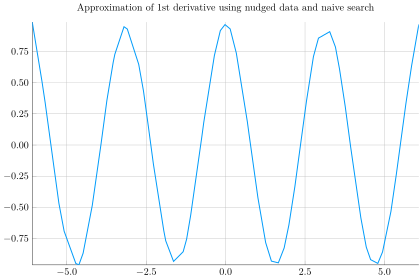

In [63]:
plot_func(xs_n, dnvs_n, "Approximation of 1st derivative using nudged data and naive search")

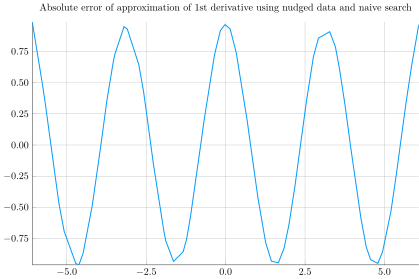

In [64]:
plot_func(xs_n, dnvs_n, "Absolute error of approximation of 1st derivative using nudged data and naive search")

In [65]:
derrfunc(nv_n, df, from, to)

(0.025812320066864545, 9.975533782180847e-9)

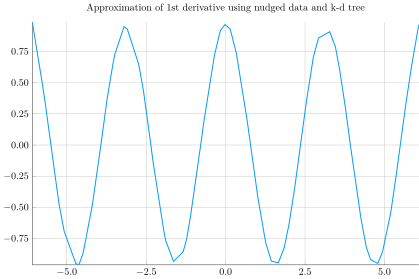

In [66]:
plot_func(xs_n, dkds_n, "Approximation of 1st derivative using nudged data and k-d tree")

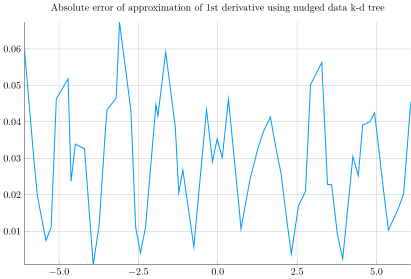

In [67]:
plot_func(xs_n, dkderr_n, "Absolute error of approximation of 1st derivative using nudged data k-d tree")

In [68]:
derrfunc(kd_n, df, from, to)

(0.02581232006689049, 9.975534410351727e-9)

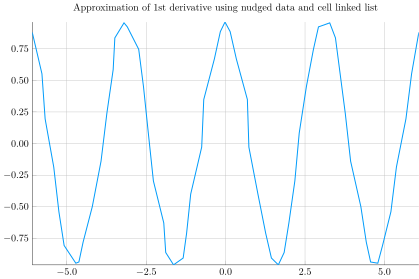

In [69]:
plot_func(xs_n, dclls, "Approximation of 1st derivative using nudged data and cell linked list")

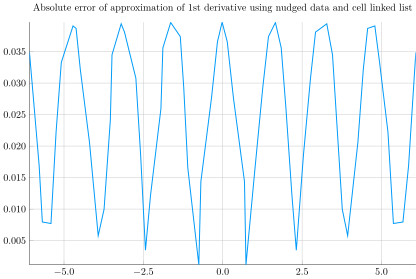

In [70]:
plot_func(xs_n, dcllerr, "Absolute error of approximation of 1st derivative using nudged data and cell linked list")

In [71]:
derrfunc(cll_n, df, from, to)

(0.025812320067713265, 9.975260009684981e-9)

In [72]:
function interpolations_mass_approx(obj, xs::Array{T}) where {T <: Real}
    [obj[x] for x in xs]
end

interpolations_mass_approx (generic function with 1 method)

In [73]:
function interpolations_mass_diff(obj, xs::Array{T}) where {T <: Real}
    [gradient(obj, x)[1] for x in xs]
end

interpolations_mass_diff (generic function with 1 method)

In [74]:
function interpolations_errfunc(obj, reffunc, b, e)
    hquadrature(x -> abs(obj[x] - reffunc(x))/(e - b), b, e, abstol = 1e-8)
end

interpolations_errfunc (generic function with 1 method)

In [75]:
function interpolations_derrfunc(obj, reffunc, b, e)
    hquadrature(x -> abs(gradient(obj, x)[1] - reffunc(x)), b, e, abstol = 1e-8)
end

interpolations_derrfunc (generic function with 1 method)

In [76]:
# init of the interpolation object from Interpolations.jl
itp = scale(interpolate(fs, BSpline(Quadratic(Reflect())), OnGrid()), rg);
# init of the interpolation object using nudged outputs
itp_n = scale(interpolate(fs_n, BSpline(Quadratic(Reflect())), OnGrid()), rg);

In [77]:
# result of approximation
itps = interpolations_mass_approx(itp, xs);

In [78]:
@time begin 
    for i in 1:time_tries
        interpolations_mass_approx(itp, xs)
    end
end

  0.000362 seconds (401 allocations: 64.094 KiB)


In [79]:
ditps = interpolations_mass_diff(itp, xs);

In [80]:
@time for i in 1:time_tries
    interpolations_mass_diff(itp, xs)
end

  0.000890 seconds (12.60 k allocations: 731.281 KiB)


In [81]:
itps_n = interpolations_mass_approx(itp_n, xs);

In [82]:
@time begin
    for i in 1:time_tries
        interpolations_mass_approx(itp_n, xs);
    end
end

  0.000343 seconds (401 allocations: 64.094 KiB)


In [83]:
ditps_n = interpolations_mass_diff(itp_n, xs);

In [84]:
@time for i in 1:time_tries
    interpolations_mass_diff(itp_n, xs)
end

  0.000847 seconds (12.60 k allocations: 731.281 KiB)


In [85]:
itperr = abs.(fs .- itps);
itperr_n = abs.(fs_n .- itps_n);
ditperr = abs.(dfs .- ditps);
ditperr_n = abs.(dfs_n .- ditps_n);

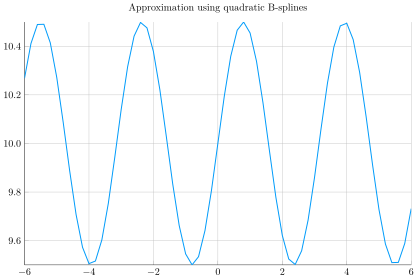

In [86]:
plot_func(xs, itps, "Approximation using quadratic B-splines")

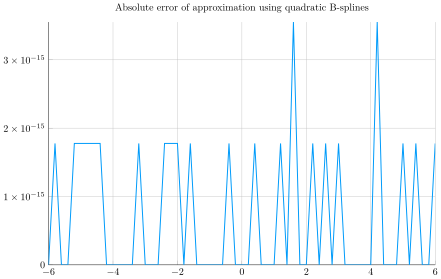

In [87]:
plot_func(xs, itperr, "Absolute error of approximation using quadratic B-splines")

In [88]:
interpolations_errfunc(itp, f, from, to)

(0.0007628307488744545, 9.953989557907484e-9)

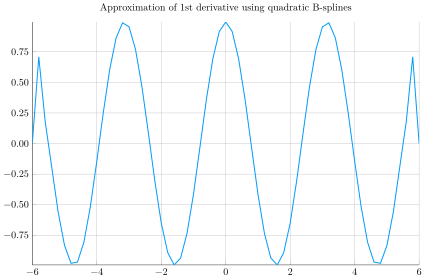

In [89]:
plot_func(xs, ditps, "Approximation of 1st derivative using quadratic B-splines")

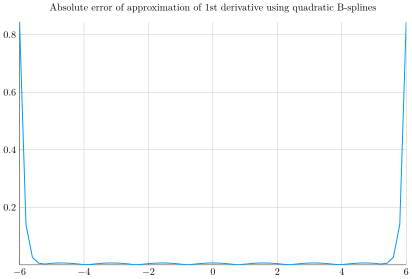

In [90]:
plot_func(xs, ditperr, "Absolute error of approximation of 1st derivative using quadratic B-splines")

In [91]:
interpolations_derrfunc(itp, df, from, to)

(0.1803822884399655, 9.925097691721498e-9)

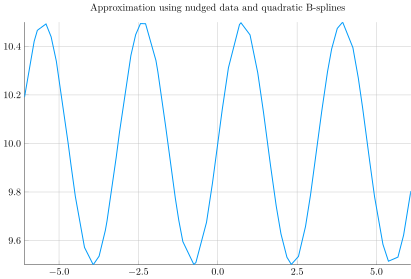

In [92]:
plot_func(xs_n, itps_n, "Approximation using nudged data and quadratic B-splines")

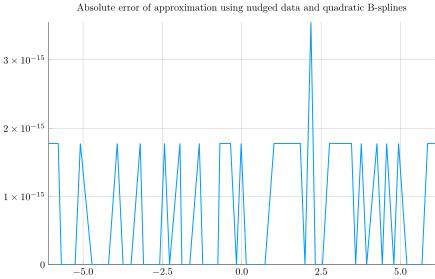

In [93]:
plot_func(xs_n, itperr_n, "Absolute error of approximation using nudged data and quadratic B-splines")

In [94]:
interpolations_errfunc(itp_n, f, from, to)

(0.03015533903393091, 9.717167901099552e-9)

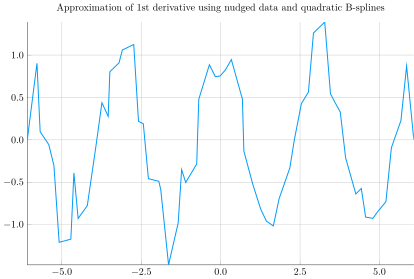

In [95]:
plot_func(xs_n, ditps_n, "Approximation of 1st derivative using nudged data and quadratic B-splines")

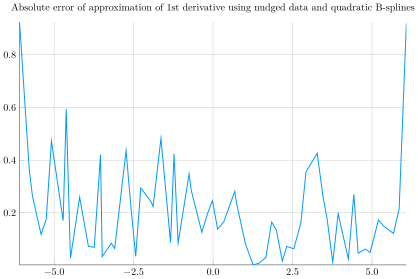

In [96]:
plot_func(xs_n, ditperr_n, "Absolute error of approximation of 1st derivative using nudged data and quadratic B-splines")

In [97]:
interpolations_derrfunc(itp_n, df, from, to)

(2.9686077459122533, 2.9348931933208072e-8)